## Tutorial scikit-image

> O processo de dividir imagens em várias regiões conhecidas, analisadas por  uma máscara inteligente de pixels é conhecido como **segmentação de imagem**. Envolve mesclar, bloquear e separar uma imagem de seu nível de integração. Dividir uma imagem em uma coleção de objetos de imagem com propriedades comparáveis é o primeiro estágio no processamento de imagem.

> **Scikit-Image** é uma das ferramentas mais popular para processamento de imagens em Python.

### Instalação

> Para instalar este módulo faça o comando seguinte no terminal.

In [3]:
#!pip install scikit-image

In [1]:
# Importing Necessary Libraries;
from skimage import data, filters, img_as_float
from skimage.color import rgb2hsv, rgb2gray, label2rgb
from skimage.filters import gaussian
from skimage.segmentation import active_contour, chan_vese, slic, mark_boundaries

import numpy as np
import matplotlib.pyplot as plt

### Convertendo o formato da imagem

#### RGB para tons de cinza

> ```rgb2gray``` é a função contida no pacote **skimage** e é utilizada para converter 3 canais RGB da imagem para somente um canal monocromático. A motivação para sua utilização é para aplicação de filtros de processamento de imagens e outras técnicas que são implementadas para receber um array em duas dimensões como argumento de entrada.   

> ```skimage.color.rgb2gray()``` Função utilizada para converter a imagem em formato RGB para tons de cinza

> **Syntax:** ```skimage.color.rgb2gray(image)```

> **Parameters:** ```image : An image – RGB format``` 

> **Return:** The image – Grayscale format

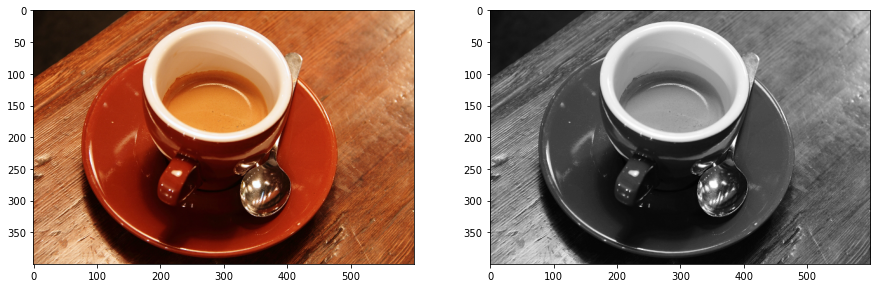

In [5]:
# Configurando o tamanho da parcela para 15,15;
plt.figure(figsize=(15, 15))

# Imagem de exemplo do pacote scikit-image;
coffee = data.coffee()
plt.subplot(1, 2, 1)

# Exibindo a imagem de exemplo
plt.imshow(coffee)

# Convertendo imagem RGB para Monocromático
gray_coffee = rgb2gray(coffee)
plt.subplot(1, 2, 2)

# Exibindo a imagem de amostra - Monocromático
# Format
plt.imshow(gray_coffee, cmap="gray")

**Explicação:** Convertendo a imagem de  3 canais para 1 canal

> Usando a função ```rgb2gray()```, a imagem RGB de 3 canais com forma (400, 600, 3) é convertida em uma imagem monocromática de canal único (400, 300). Estaremos usando imagens em tons de cinza para a implementação adequada das funções de limiarização, por exemplo. A média dos valores de pixel vermelho, verde e azul para cada pixel para obter o valor da escala de cinza é uma abordagem simples para converter uma matriz 3D de imagem colorida em uma matriz 2D em escala de cinza. Isso cria uma aproximação de cinza aceitável combinando as contribuições de luminosidade ou brilho de cada faixa de cor.

### RGB to HSV

> O modelo de cores HSV (Hue, Saturation, Value) remapeia as cores básicas RGB em dimensões que são mais simples de compreender para humanos. O espaço de cores RGB descreve as proporções de vermelho, verde e azul em uma cor. No sistema de cores HSV, as cores são definidas em termos de **matiz, saturação e valor**.

> **skimage.color.rgb2hsv()** Função utilizada para converter a imagem do formato RGB para HSV

        Syntax: skimage.color.rgb2hsv(image)

        Parameters: image : An image – RGB format

        Return: The image – HSV format

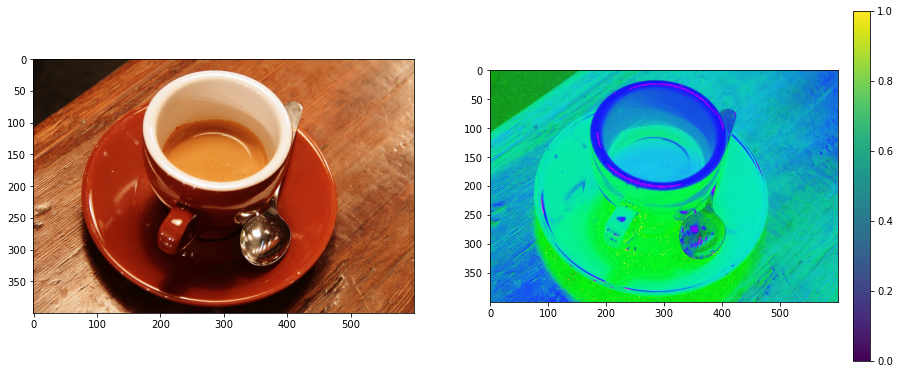

In [9]:
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
coffee = data.coffee()
plt.subplot(1, 2, 1)

# Displaying the sample image
plt.imshow(coffee)

# Converting RGB Image to HSV Image
hsv_coffee = rgb2hsv(coffee)
plt.subplot(1, 2, 2)

# Exibindo a imagem de amostra - Formato HSV
hsv_coffee_colorbar = plt.imshow(hsv_coffee)

# Ajustando a barra de cores para caber no tamanho da imagem
plt.colorbar(hsv_coffee_colorbar, fraction=0.046, pad=0.04)

### Segmentação Supervisionada

> Neste tipo de segmentação existe interferência manual  para parametrizar a segmentação da imagem.

### Segmentação por Limiarização – Parametrização manual

> Um valor de pixel variando de 0 a 255 é usado com limiar para separar a imagem do fundo. Isso resulta em uma imagem modificada, binária em que os pixels com maior valor que o limiar assume valor 255 e pixels com menor valor que o limiar assumem valor  zero.

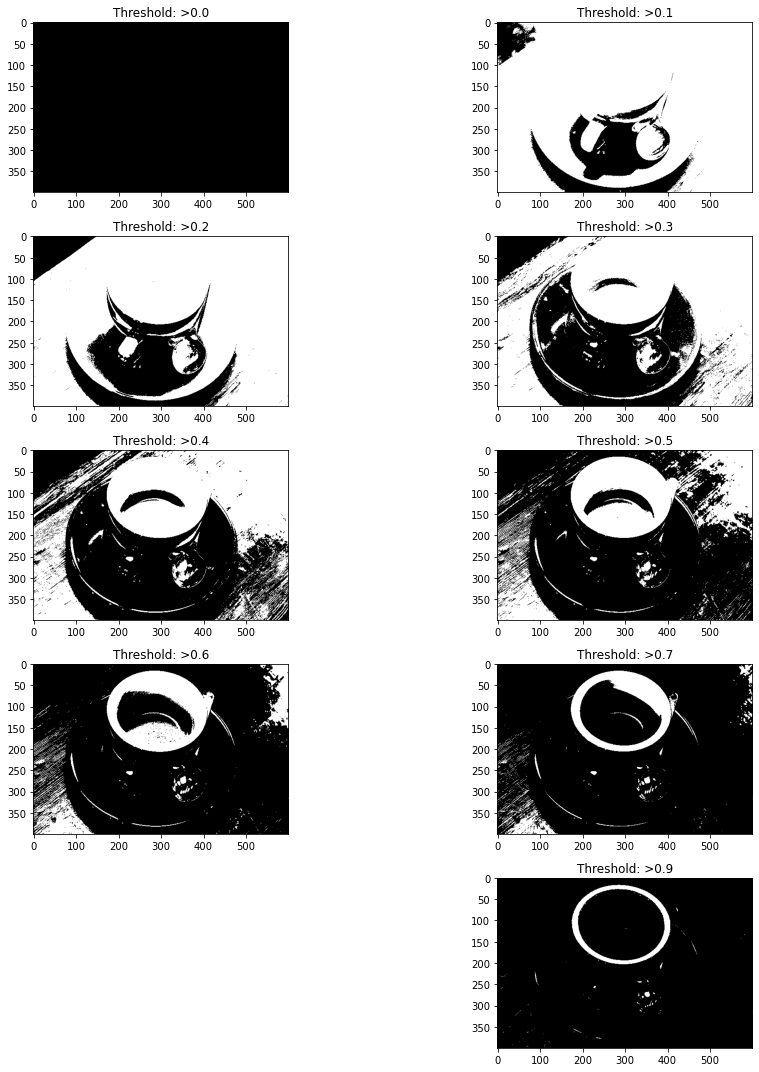

In [14]:
# Sample Image of scikit-image package
coffee = data.coffee()
gray_coffee = rgb2gray(coffee)

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

for i in range(10):
    # Iterating different thresholds
    binarized_gray = (gray_coffee > i*0.1)*1
    plt.subplot(5,2,i+1)
    
    # Rounding of the threshold
    # value to 1 decimal point
    plt.title("Threshold: >"+str(round(i*0.1,1)))
    
    # Displaying the binarized image
    # of various thresholds
    plt.imshow(binarized_gray, cmap = 'gray')
    plt.tight_layout()

> **Explicação:** O primeiro passo nesta limiarização é normalizar a imagem de 0 – 255 para 0 – 1. Um valor de limiar é fixo e na comparação, se avaliado como verdadeiro, armazenamos o resultado como 1, caso contrário, 0. Isso globalmente imagem binarizada pode ser usada para detectar bordas, bem como analisar contraste e diferença de cor.

### Segmentação com limiarização utilizando skimage.filters

> A técnica de **limiarização de Niblack e Sauvola** foi desenvolvida especificamente para melhorar a qualidade das imagens microscópicas. É uma abordagem de limiarização local que altera o limiar dependendo da média local e do desvio padrão para cada pixel em uma máscara em convolução com a imagem. Já a técnica de **limiarização de Otsu** funciona iterando sobre todos os valores de limiar possíveis e calculando uma medida de dispersão para os pontos de amostra em ambos os lados do limiar, ou seja, em primeiro plano ou em segundo plano. 

**```skimage.filters.threshold_otsu()```**

    Syntax: skimage.filters.threshold_otsu(image)
    
    Parameters:
        image : An image – Monochrome format
        nbins : Number of bins required for histogram calculation
        hist : Histogram from which threshold has to be calculated
        Return : threshold : Larger pixel intensity 

**```skimage.filters.threshold_niblack()```**

    Syntax: skimage.filters.threshold_niblack(image)

    Parameters:
        image : An image – Monochrome format
        window_size : Window size – odd integer
        k : A positive parameter
        Return : threshold : A threshold mask equal to the shape of the image

**```skimage.filters.threshold_sauvola()```**

    Syntax: skimage.filters.threshold_sauvola(image)

    Parameters:
        image : An image – Monochrome format
        window_size : Window size – odd integer
        k : A positive parameter
        r : A positive parameter – dynamic range of standard deviation
        Return : threshold : A threshold mask equal to the shape of the image

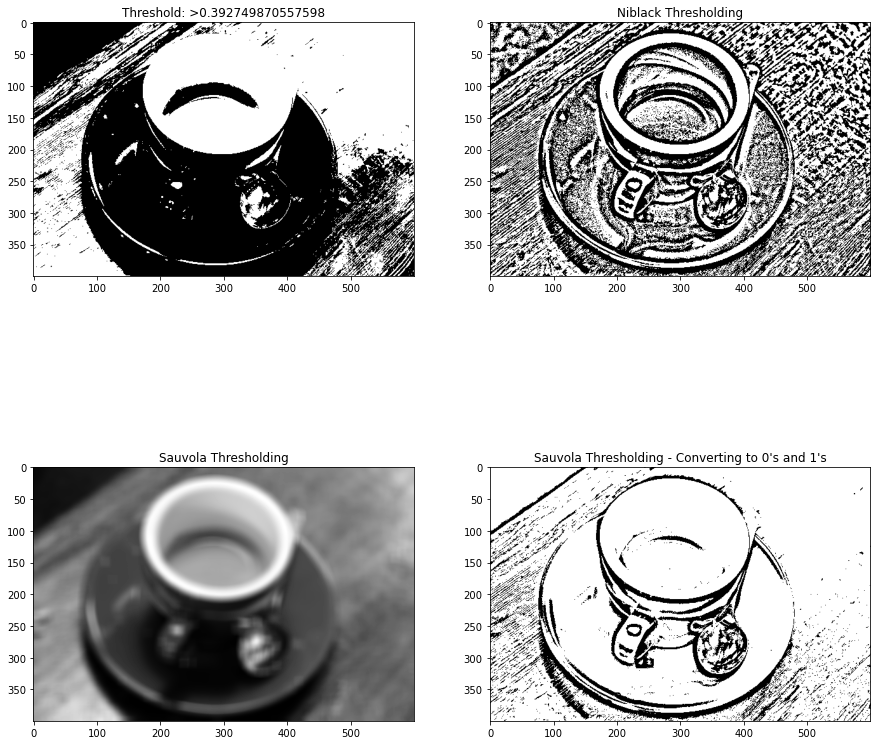

In [15]:
# Setting plot size to 15, 15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
coffee = data.coffee()
gray_coffee = rgb2gray(coffee)

# Calculando o valor de limiar de Otsu
threshold = filters.threshold_otsu(gray_coffee)

# Calculando valores binarizados usando os valores obtidos
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))

# Exibindo a imagem binarizada
plt.imshow(binarized_coffee, cmap = "gray")

# Calculando o pixel local de Ni black
# valores de limite para cada pixel
threshold = filters.threshold_niblack(gray_coffee)

# Calculando valores binarizados usando os valores obtidos
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")

# Exibindo a imagem binarizada
plt.imshow(binarized_coffee, cmap = "gray")

# Calculando o limite de pixel local do Sauvola
# valores para cada pixel - Não Binarizado
threshold = filters.threshold_sauvola(gray_coffee)
plt.subplot(2,2,3)
plt.title("Sauvola Thresholding")

# Exibindo os valores de limite local
plt.imshow(threshold, cmap = "gray")

# Calculando o pixel local do Sauvola
# valores de limite para cada pixel - Binarizado
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,4)
plt.title("Sauvola Thresholding - Converting to 0's and 1's")

# Exibindo a imagem binarizada
plt.imshow(binarized_coffee, cmap = "gray")

> **Explicação:** Essas técnicas de limiarização local usam média e desvio padrão como seus principais parâmetros de cálculo.O pixel local final também é calculado basedado em outros parâmetros positivos. Isso é feito para garantir a separação entre o objeto e o fundo.

### Segmentação por Contorno Ativo

> O conceito de minimização funcional de energia sustenta o método de contorno ativo. Um contorno ativo é uma abordagem de segmentação que usa forças e restrições de energia para separar os pixels de interesse do restante da imagem para posterior processamento e análise. O termo “contorno ativo” refere-se a um modelo no processo de segmentação.

**```skimage.segmentation.active_contour()```**

    Syntax: skimage.segmentation.active_contour(image, snake)

    Parameters:
        image : An image
        snake : Initial snake coordinates – for bounding the feature
        alpha : Snake length shape
        beta : Snake smoothness shape
        w_line : Controls attraction – Brightness
        w_edge : Controls attraction – Edges
        gamma : Explicit time step
        Return : snake : Optimised snake with input parameter’s size

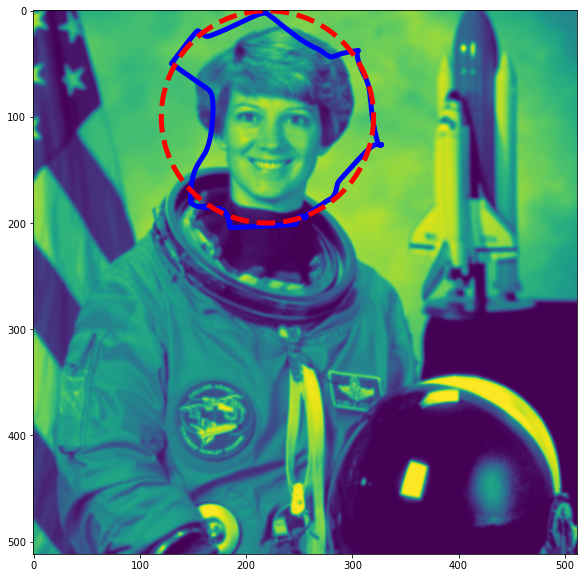

In [23]:
# Exemplo de imagem do pacote scikit-image
astronaut = data.astronaut()
gray_astronaut = rgb2gray(astronaut)

# Aplicando o filtro gaussiano para remover o ruído
gray_astronaut_noiseless = gaussian(gray_astronaut, 1)

# Localizando o centro do círculo em 220, 110
x1 = 220 + 100*np.cos(np.linspace(0, 2*np.pi, 500))
x2 = 100 + 100*np.sin(np.linspace(0, 2*np.pi, 500))

# Gerando um círculo baseado em x1, x2
snake = np.array([x1, x2]).T

# Calculando o contorno ativo para a imagem fornecida
astronaut_snake = active_contour(gray_astronaut_noiseless, snake)
fig = plt.figure(figsize=(10, 10))

# Adicionando subtramas para exibir os marcadores
ax = fig.add_subplot(111)

# Imagem de amostra de plotagem
ax.imshow(gray_astronaut_noiseless)

# Plotando o marcador de limite de face
ax.plot(astronaut_snake[:, 0],
astronaut_snake[:, 1],'-b', lw=5)

# Traçando o círculo ao redor do rosto
ax.plot(snake[:, 0], snake[:, 1], '--r', lw=5)

> **Explicação:** O modelo de contorno ativo está entre as abordagens dinâmicas na segmentação de imagens que usam as restrições de energia e pressões da imagem para separar as regiões de interesse. Para segmentação, um contorno ativo estabelece uma borda ou curvatura diferente para cada seção do objeto alvo. O modelo de contorno ativo é uma técnica para minimizar a função de energia resultante de forças externas e internas. Uma força externa é especificada como curvas ou superfícies, enquanto uma força interna é definida como dados de imagem. A força externa é uma força que permite que os contornos iniciais se transformem automaticamente em formas de objetos em imagens.

### Segmentação de Chan-Vese 

> O método de segmentação iterativa **Chan-Vese** divide uma imagem em dois grupos com a menor variância intraclasse. Este algoritmo usa conjuntos que são evoluídos iterativamente para minimizar a energia, que é caracterizada por pesos correspondentes ao total de variações de intensidade da média geral fora da região segmentada, a soma das diferenças da média geral dentro do vetor de características e um termo que é diretamente proporcional ao comprimento da borda da região fragmentada.
 

**```skimage.segmentation.chan_vese()```**

    Syntax: skimage.segmentation.chan_vese(image)

    Parameters:
        image : An image
        mu : Weight – Edge Length
        lambda1 : Weight – Difference from average
        tol : Tolerance of Level set variation
        max_num_iter : Maximum number of iterations
        extended_output : Tuple of 3 values is returned
        Return :
            segmentation : Segmented Image
            phi : Final level set
            energies: Shows the evolution of the energy

C:\Users\andressa.moreira\AppData\Local\Temp\ipykernel_121328\3845652868.py:8: FutureWarning: `max_iter` is a deprecated argument name for `chan_vese`. It will be removed in version 1.0. Please use `max_num_iter` instead.
  chanvese_gray_astronaut = chan_vese(gray_astronaut, max_iter=100, extended_output=True)


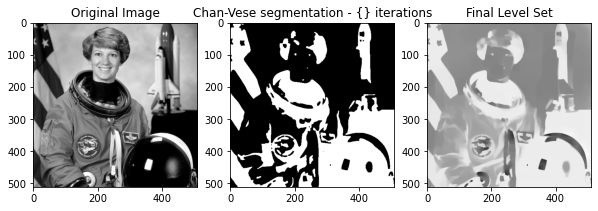

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10))

# Exemplo de imagem do pacote scikit-image
astronaut = data.astronaut()
gray_astronaut = rgb2gray(astronaut)

# Computando a técnica de segmentação Chan VESE
chanvese_gray_astronaut = chan_vese(gray_astronaut, max_iter=100, extended_output=True)
ax = axes.flatten()

# Plotting the original image
ax[0].imshow(gray_astronaut, cmap="gray")
ax[0].set_title("Original Image")

# Plotting the segmented - 100 iterations image
ax[1].imshow(chanvese_gray_astronaut[0], cmap="gray")
title = "Chan-Vese segmentation - {} iterations"
format(len(chanvese_gray_astronaut[2]))
ax[1].set_title(title)

# Plotting the final level set
ax[2].imshow(chanvese_gray_astronaut[1], cmap="gray")
ax[2].set_title("Final Level Set")
plt.show()

> **Explicação:**  O modelo Chan-Vese para contornos ativos é uma abordagem forte e versátil para segmentar uma ampla gama de imagens, incluindo algumas que seriam difíceis de segmentar usando métodos “tradicionais”, como limiares ou métodos baseados em gradiente. Este modelo é comumente usado em imagens médicas, particularmente para segmentação do cérebro, coração e traqueia. O modelo é baseado em um problema de minimização de energia que pode ser reformulado em uma formulação de conjunto de níveis para tornar o problema mais fácil de resolver.
 

### Segmentação Não Supervisionada

#### Mark Boundaries 

> Essa técnica produz uma imagem com bordas destacadas entre as áreas rotuladas, onde as imagens foram segmentadas pelo método SLIC.

**```skimage.segmentation.mark_boundaries()```**

    Syntax: skimage.segmentation.mark_boundaries(image)

    Parameters:
        image : An image
        label_img : Label array with marked regions
        color : RGB color of boundaries
        outline_color : RGB color of surrounding boundaries
        Return : marked : An image with boundaries are marked

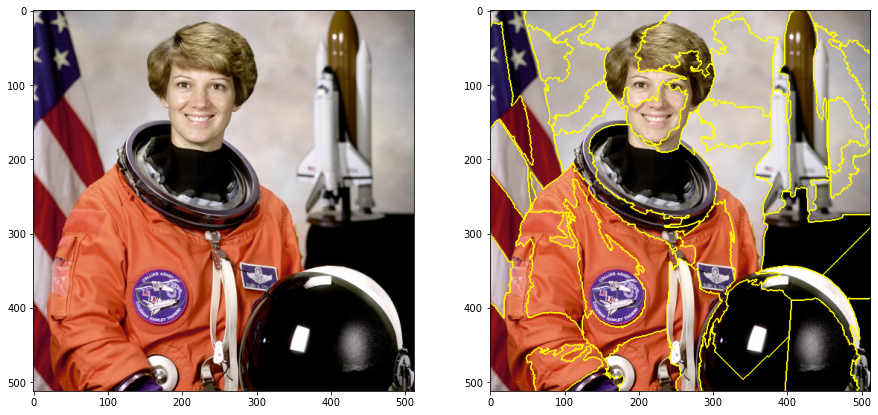

In [28]:
# Importing required boundaries
from skimage.segmentation import slic, mark_boundaries
from skimage.data import astronaut

# Setting the plot figure as 15, 15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
astronaut = astronaut()

# Applying SLIC segmentation
# for the edges to be drawn over
astronaut_segments = slic(astronaut,n_segments=100,compactness=1)
plt.subplot(1, 2, 1)

# Plotting the original image
plt.imshow(astronaut)

# Detecting boundaries for labels
plt.subplot(1, 2, 2)

# Plotting the ouput of marked_boundaries
# function i.e. the image with segmented boundaries
plt.imshow(mark_boundaries(astronaut, astronaut_segments))

> **Explicação:**  Foi realizada uma clusterização na imagem em 100 segmentos com compacidade = 1 e esta imagem segmentada atuará como um array rotulado para a função mark_boundaries(). Cada segmento da imagem agrupada é diferenciado por um valor inteiro e o resultado de mark_boundaries são os limites sobrepostos entre os rótulos


### Limirização com Clusterização Iterativa

> Ao combinar pixels no plano da imagem com base em sua semelhança e proximidade de cores, esse método gera superpixels. O Simple Linear Iterative Clustering é a abordagem mais atualizada para segmentar superpixels e requer muito pouco poder de computação. Em poucas palavras, a técnica agrupa pixels em um espaço de plano de cor e imagem de cinco dimensões para criar superpixels pequenos e quase uniformes.

**```skimage.segmentation.slic()```**

    Syntax: skimage.segmentation.slic(image)

    Parameters:
        image : An image
        n_segments : Number of labels
        compactness : Balances color and space proximity.
        max_num_iter : Maximum number of iterations
        Return : labels: Integer mask indicating segment labels.

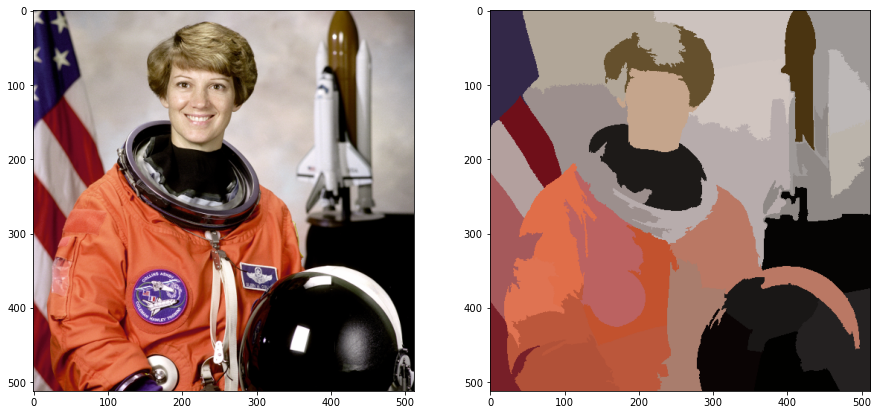

In [3]:
# Importing required libraries

# Setting the plot size as 15, 15
plt.figure(figsize=(15,15))
# Sample Image of scikit-image package
astronaut = data.astronaut()
# Applying Simple Linear Iterative
# Clustering on the image
# - 50 segments & compactness = 10
astronaut_segments = slic(astronaut,
n_segments=50,
compactness=10)
plt.subplot(1,2,1)
# Plotting the original image
plt.imshow(astronaut)
plt.subplot(1,2,2)
# Converts a label image into
# an RGB color image for visualizing
# the labeled regions.
plt.imshow(label2rgb(astronaut_segments,
astronaut,
kind = 'avg'))

Explicação: Essa técnica cria superpixels agrupando pixels no plano da imagem com base em sua similaridade e proximidade de cores. Isso é feito no espaço 5-D, onde XY é a localização do pixel. Como a maior distância possível entre duas cores no espaço CIELAB é restrita, mas a distância espacial no plano XY é dependente do tamanho da imagem, devemos normalizar as distâncias espaciais para aplicar a distância euclidiana neste espaço 5D. Como resultado, uma nova medida de distância que leva em consideração o tamanho do superpixel foi criada para agrupar os pixels neste espaço 5D.



Segmentação de Felzenszwalb
A proposta é produzir uma supersegmentação de uma imagem RGB usando um agrupamento rápido e mínimo baseado em árvore. Isso pode ser usado para isolar recursos e identificar arestas. Este algoritmo usa a distância euclidiana entre os pixels. A função skimage.segmentation.felzenszwalb() é usada para calcular a segmentação de imagem baseada no grafo  do Felsenszwalb.  

Syntax : skimage.segmentation.felzenszwalb(image)

Parameters :

image : An input image
scale : Higher value – larger clusters
sigma : Width of Gaussian kernel
min_size : Minimum component size
Return : segment_mask : Integer mask indicating segment labels. 

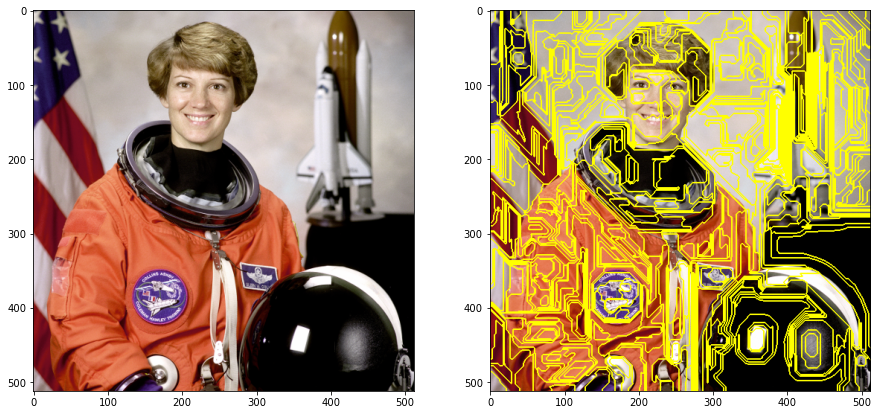

In [5]:
# Importing the required libraries
from skimage.segmentation import felzenszwalb
from skimage.color import label2rgb
from skimage.data import astronaut
# Setting the figure size as 15, 15
plt.figure(figsize=(15,15))
# Sample Image of scikit-image package
astronaut = astronaut()
# computing the Felzenszwalb's
# Segmentation with sigma = 5 and minimum
# size = 100
astronaut_segments = felzenszwalb(astronaut,
scale = 2,
sigma=5,
min_size=100)
# Plotting the original image
plt.subplot(1,2,1)
plt.imshow(astronaut)
# Marking the boundaries of
# Felzenszwalb's segmentations
plt.subplot(1,2,2)
plt.imshow(mark_boundaries(astronaut,
astronaut_segments))